# PREDICTING HEART DISEASE USING MACHINE LEARNING 

# PREPARING THE TOOLS
GOING TO USE PANDAS , MATPLOTLIB AND NUMPY FOR DATA ANALYSIS AND MANIPULATION 

In [4]:
#Import all the tools we need

# Regular EDA(explanatory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline 
#we want our plots to appear inside the notebook 

# models from Scikit-Learn 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 

#Model evaluation 
from sklearn.model_selection import train_test_split , cross_val_score 
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import precision_score, recall_score , f1_score
from sklearn.metrics import RocCurveDisplay 

## Load data

In [5]:
df= pd.read_csv("heart-disease.csv")

In [6]:
df.shape   #rows,columns

(303, 14)

## Data exploration 
The goal here is to find about all about the data and become a subject matter export on the dataset you are working with

1.What questions are you trying to solve?


2.What kind of data we have and how do we treat different types?


3.What's missing form the data and how do we deal with it?


4.Where are the outliers and why do we care about them 


5.How can u add,change or remove features to get more out of your data

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [9]:
#Let's find out how many of each class there 
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

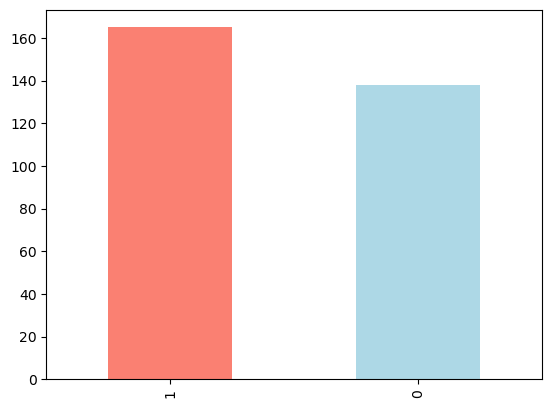

In [10]:
df["target"].value_counts().plot(kind="bar", color=["salmon", 'lightblue']);

In [11]:
#Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Heart Disease Frequency according to Sex

In [12]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [13]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


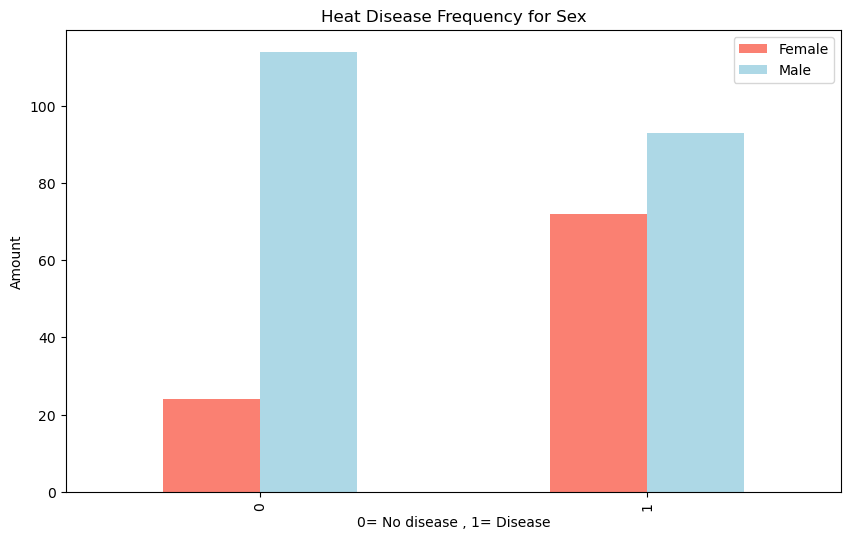

In [14]:
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(10,6), color=["salmon", "lightblue"]);

plt.title("Heat Disease Frequency for Sex")
plt.xlabel("0= No disease , 1= Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"]);

### Age vs Max Heart Rate for Heart Disease

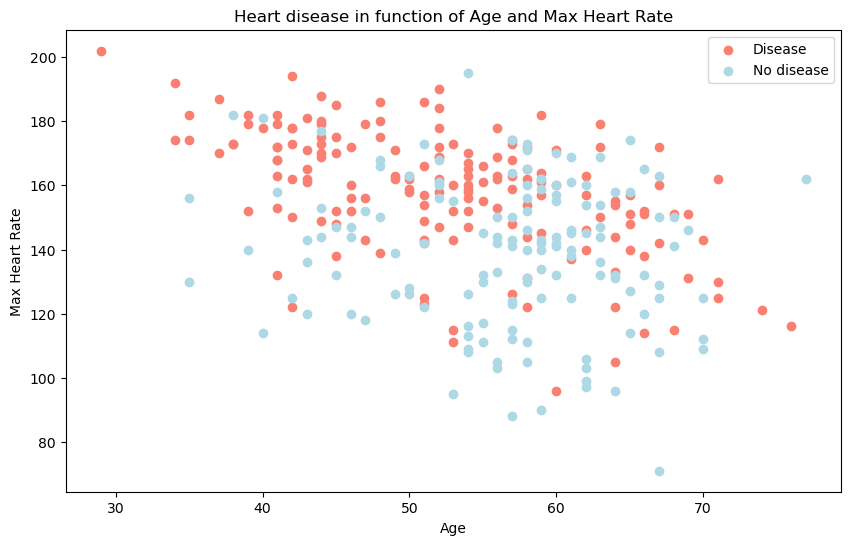

In [15]:
#Create another figure 
plt.figure(figsize=(10,6))

#Scatter with positive examples 
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1], 
           c="salmon")

#Scatter with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue")

#Add some helpful info
plt.title("Heart disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No disease"]);

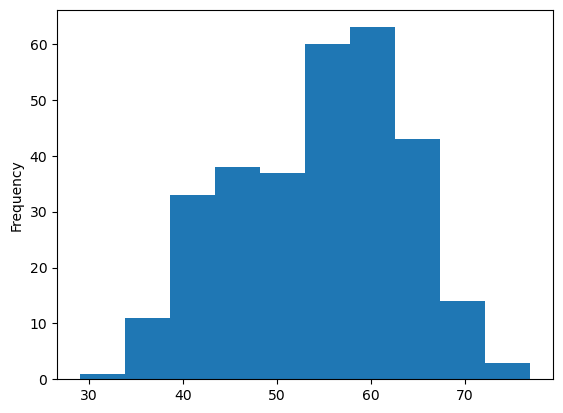

In [16]:
#Check distribution of the age column with a histogram 
df.age.plot.hist();

### Heart disease frequency per Chest pain type
Value 0: typical angina
Value 1: atypical angina
Value 2: non-anginal pain
Value 3: asymptomatic

In [17]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


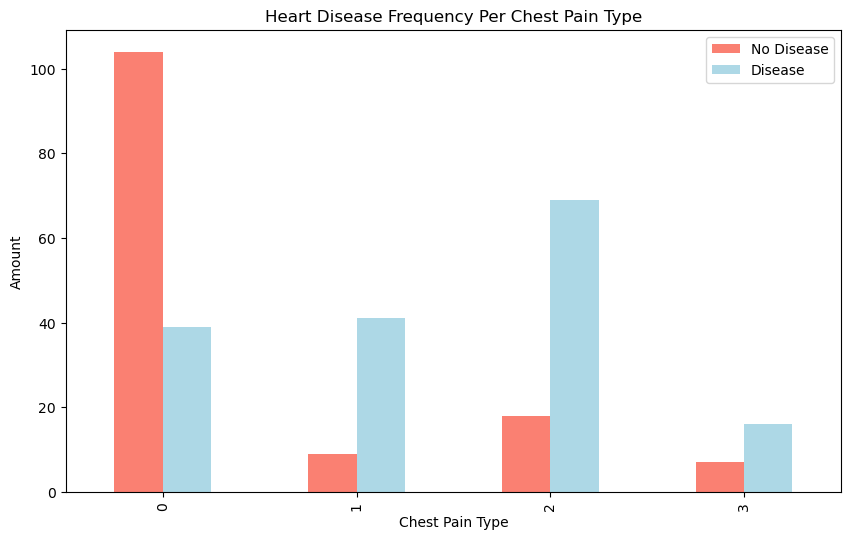

In [18]:
#Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"])

#Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])

In [19]:
#Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


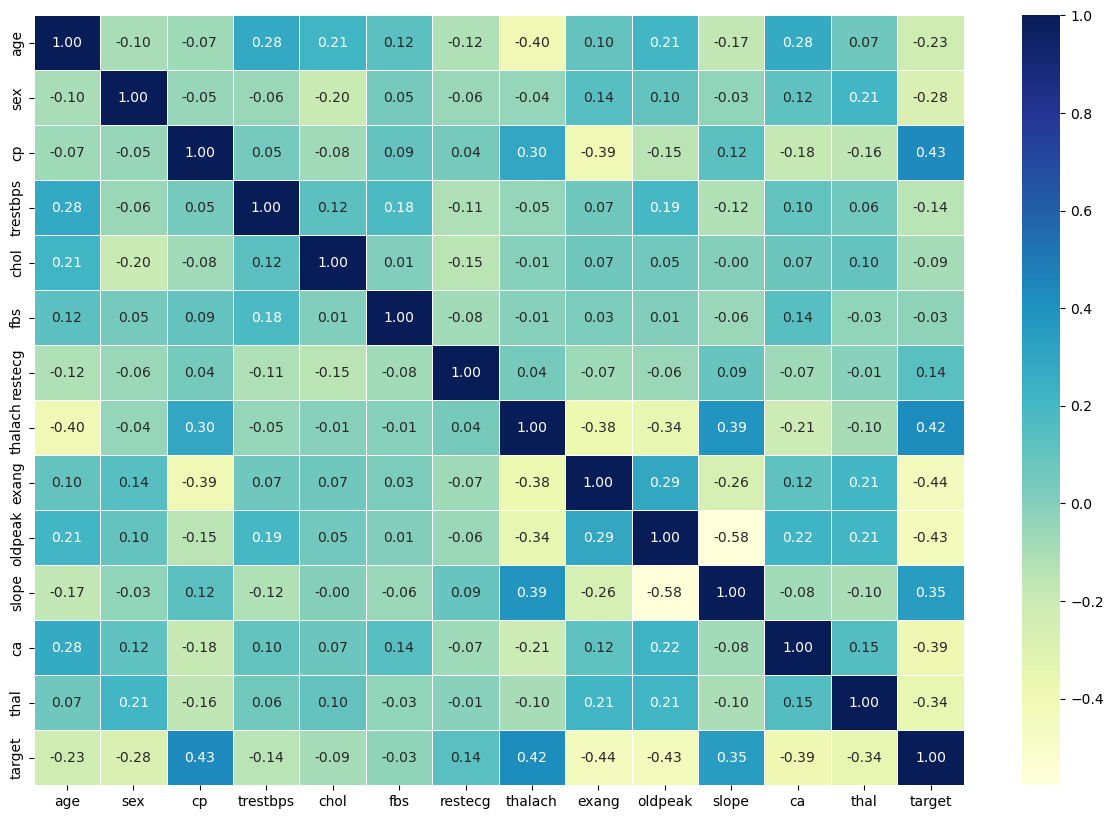

In [20]:
corr_matrix= df.corr()
fig, ax =plt.subplots(figsize=(15, 10))
ax= sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f",
               cmap="YlGnBu")

## 5.Modelling

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
#Split data into X and Y 
x=df.drop("target", axis=1)

y=df["target"]

In [23]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [24]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [25]:
#Split into train and test sets 
np.random.seed(42)

# Split into train & test set 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [26]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [27]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64


Time to build a machine learning models 

We are going to try 3 different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbors Classifier 
3. Random Forest Classifier

In [28]:
#Put models in a dictionary 
models= {"Logistic Regression": LogisticRegression(),
        "KNN": KNeighborsClassifier(),
        "Random Forest": RandomForestClassifier()}

#Create a function and score models 
def fit_and_score(models, x_train, x_test , y_train, y_test):
    np.random.seed(42)
                  #Make a dictionary to keep model scores
    model_scores={}
    # Loop through models
    for name , model in models.items():
        #Fit the model to the data 
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model scores
        model_scores[name]= model.score(x_test, y_test)
    return model_scores    

In [29]:
model_scores = fit_and_score(models=models, x_train=x_train, x_test=x_test, y_train= y_train, y_test=y_test)
model_scores

C:\Users\siddh\OneDrive\Desktop\sample_project_1\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparison

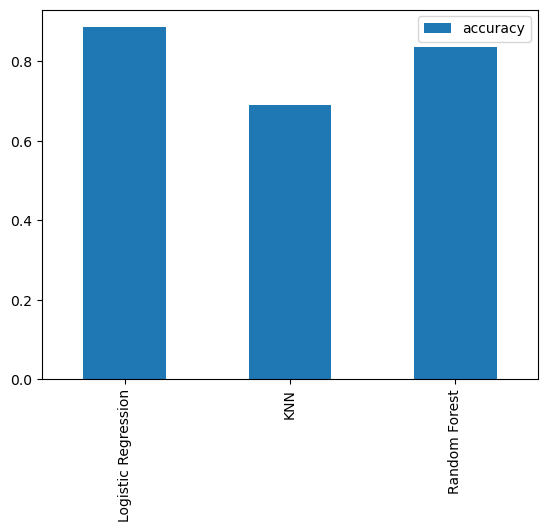

In [30]:
model_compare= pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

* Hyperparameter tuning
* Feature importance 
* Confusion matrix
* Cross validation
* Precision
* Recall
* F1 Score
*  Classification report
* ROC Curve
* Area under the curve

## Hyperparameter Tuning

In [31]:
#Lets tune KNN
train_scores = []
test_scores = []

#Create a list of diff values for n_neighbors
neighbors = range(1,21)

#Setup KNN instance
knn= KNeighborsClassifier()

#Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #Fit the algorithm
    knn.fit(x_train,y_train)
    
    #Update the training score list 
    train_scores.append(knn.score(x_train, y_train))
    
    #Update the test scores list
    test_scores.append(knn.score(x_test, y_test))
    

In [32]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [33]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN Score on the test data: 75.41%


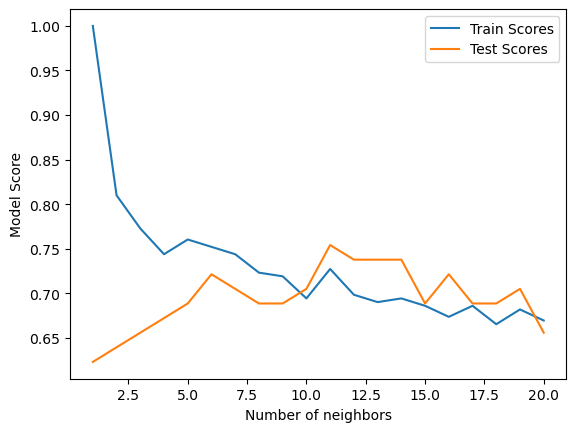

In [34]:
plt.plot(neighbors, train_scores, label= "Train Scores")
plt.plot(neighbors, test_scores, label="Test Scores")
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN Score on the test data: {max(test_scores)*100:.2f}%")

         

## TUNING MODELS WITH RANDOMISEDSEARCHCV

In [35]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Now let's use RandomizedSearchCV to try and tune our LogisticRegression model.

In [36]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [37]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [38]:
rs_log_reg.score(x_test, y_test)


0.8852459016393442

Now we've tuned LogisticRegression using RandomizedSearchCV, we'll do the same for RandomForestClassifier.



In [50]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [51]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [52]:
# Evaluate the randomized search random forest model
rs_rf.score(x_test, y_test)

0.8688524590163934

In [53]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(x_train, y_train);


Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [54]:
# Check the best parameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [55]:
# Evaluate the model
gs_log_reg.score(x_test, y_test)

0.8852459016393442

## Evaluating a classification model, beyond accuracy
Now we've got a tuned model, let's get some of the metrics we discussed before.

We want:

* ROC curve and AUC score - plot_roc_curve()
* Confusion matrix - confusion_matrix()
* Classification report - classification_report()
* Precision - precision_score()
* Recall - recall_score()
* F1-score - f1_score()

In [56]:
# Make preidctions on test data
y_preds = gs_log_reg.predict(x_test)

In [57]:
y_preds


array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [58]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

## ROC Curve and AUC Scores

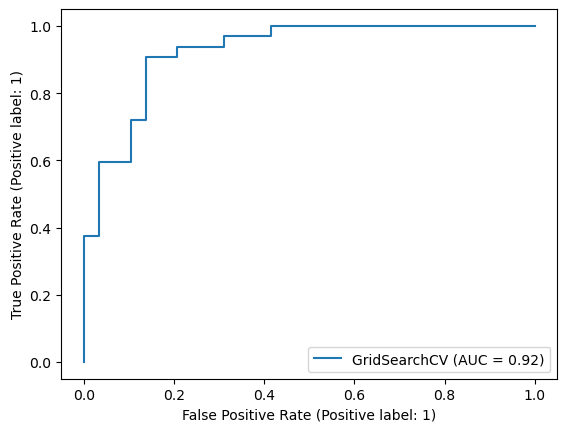

In [59]:
# Plot ROC curve and calculate AUC metric
RocCurveDisplay.from_estimator(estimator=gs_log_reg,X=x_test, 
                               y=y_test); 

In [60]:
# COnfusion Matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


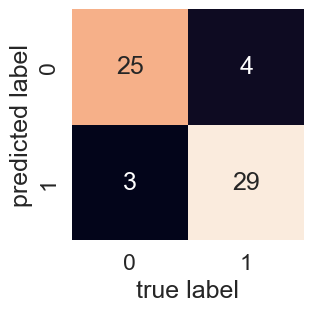

In [61]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_pred) :
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

The model gets confused (predicts the wrong label) relatively the same across both classes. In essence, there are 4 occasaions where the model predicted 0 when it should've been 1 (false negative) and 3 occasions where the model predicted 1 instead of 0 (false positive).

## Classification report

In [62]:
# Show classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross-validation

We're going to calculate precision , recall and f1 score of our model

In [65]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [66]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score

# Instantiate best model with best hyperparameters (found with GridSearchCV)
clf = LogisticRegression(C=0.23357214690901212,
                         solver="liblinear")

In [69]:
# Cross-validated accuracy score
cv_acc = cross_val_score(clf,
                         x,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

Since there arev 5 metrics here , we'll take the average

In [70]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [72]:
# Cross-validated precision score
cv_precision = np.mean(cross_val_score(clf,
                                       x,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv_precision

0.8215873015873015

In [74]:
# Cross-validated recall score
cv_recall = np.mean(cross_val_score(clf,
                                    x,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv_recall

0.9272727272727274

In [76]:
# Cross-validated F1 score
cv_f1 = np.mean(cross_val_score(clf,
                                x,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_f1

0.8705403543192143

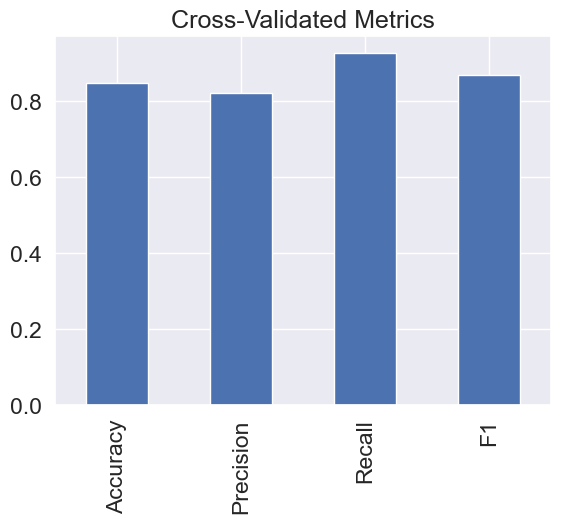

In [77]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

### Feature Importance 


In [79]:
# Fit an instance of LogisticRegression (taken from above)
clf.fit(x_train, y_train);

In [80]:
# Check coef_
clf.coef_

array([[ 0.00369922, -0.90424087,  0.67472828, -0.0116134 , -0.00170364,
         0.04787689,  0.33490186,  0.02472938, -0.63120403, -0.57590919,
         0.4709512 , -0.6516535 , -0.69984202]])

In [81]:
# Match features to columns
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': 0.003699219011760782,
 'sex': -0.9042408714480176,
 'cp': 0.6747282766540338,
 'trestbps': -0.01161340334265323,
 'chol': -0.0017036446360052262,
 'fbs': 0.04787688669240361,
 'restecg': 0.3349018562558094,
 'thalach': 0.024729384743360134,
 'exang': -0.631204028843173,
 'oldpeak': -0.575909185434028,
 'slope': 0.47095119664446533,
 'ca': -0.6516535002884537,
 'thal': -0.6998420233395882}

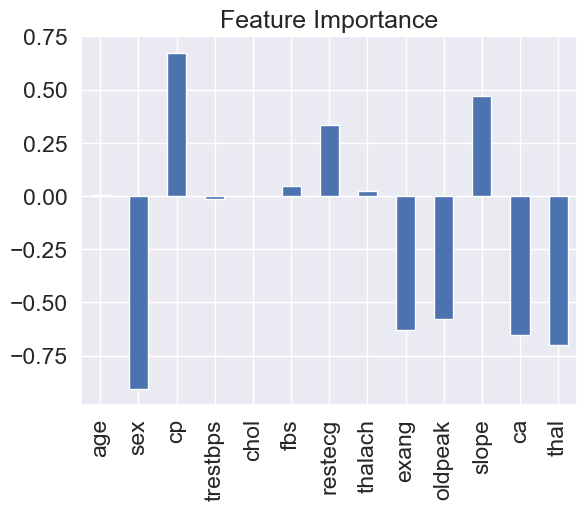

In [82]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

In [83]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [84]:

# Contrast slope (positive coefficient) with target
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107
